In [1]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from main_ml import main

## 조건 설정

In [2]:
# Raw_Data.xlsx를 두고 있는 폴더의 경로
path = 'C:/Users/KRX/Projects/Capacity_Planning/Data/'
# 분석 데이터 선택
path_data = path+'Raw_Data.xlsx'
# 상관관계 데이터 저장 경로
path_data_corr = path+'Raw_Data_corr.xlsx'

# 도메인지식을 활용하여 선택한 최종 변수
lst_sel_features = ["N_Order", "N_Trade", "P_Trading_Volume_F", 
                    "N_Investor", "N_Traded_Symbol_O", "P_Margin","P_K200S","P_VKOSPI"]
# 주요 변수 선택
Stat_Features = ["N_Order_T1","P_VKOSPI_T1","Max_Capacity"]

# 심리지수의 포함여부에 따라 성능이 달라지는지 여부를 확인하기 위해 제거할 변수 선택
lst_cols_remove = ["P_VKOSPI_T1","P_VKOSPI_T2","P_VKOSPI_T3","P_VKOSPI_T4","P_VKOSPI_T5","P_VKOSPI_T6","P_VKOSPI_T7",
                      "P_VKOSPI_T8","P_VKOSPI_T9","P_VKOSPI_T10","P_VKOSPI_T11","P_VKOSPI_T12","P_VKOSPI_T13","P_VKOSPI_T14",
                      "P_VKOSPI_T15","P_VKOSPI_T16","P_VKOSPI_T17","P_VKOSPI_T18","P_VKOSPI_T19","P_VKOSPI_T20", 
                      "P_VKOSPI_T21","P_VKOSPI_T22","P_VKOSPI_T23","P_VKOSPI_T24","P_VKOSPI_T25","P_VKOSPI_T26","P_VKOSPI_T27",
                      "P_VKOSPI_T28","P_VKOSPI_T29","P_VKOSPI_T30","P_VKOSPI_T31","P_VKOSPI_T32","P_VKOSPI_T33","P_VKOSPI_T34",
                      "P_VKOSPI_T35","P_VKOSPI_T36","P_VKOSPI_T37","P_VKOSPI_T38","P_VKOSPI_T39","P_VKOSPI_T40","P_VKOSPI_T41",
                      "P_VKOSPI_T42","P_VKOSPI_T43","P_VKOSPI_T44","P_VKOSPI_T45","P_VKOSPI_T46","P_VKOSPI_T47",
                      "P_VKOSPI_T48","P_VKOSPI_T49","P_VKOSPI_T50","P_VKOSPI_T51","P_VKOSPI_T52","P_VKOSPI_T53","P_VKOSPI_T54",
                      "P_VKOSPI_T55","P_VKOSPI_T56","P_VKOSPI_T57","P_VKOSPI_T58","P_VKOSPI_T59","P_VKOSPI_T60"]

# 모델 선택 - 현재 해당 분석에서 모델들은 모두 사용하게 설정
# 따라서, 파라미터의 범위만 변경 가능
model_rf = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lasso = Lasso()
model_ridge = Ridge()
model_xgb = XGBRegressor()

# 튜닝할 파라미터 선택
lst_params_rf = {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[4, 8, 12, 16, 20]}
lst_params_dt = {"criterion": ["mse", "mae"], "min_samples_split": [5, 10, 20], "max_depth": [6, 8, 10, 12],
                 "min_samples_leaf": [5, 10, 15, 20], "max_leaf_nodes": [5, 10, 20]}
lst_params_lasso = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lst_params_ridge = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lst_params_xgb =  {'max_depth':[ 6, 8, 10, 12],'n_estimators':[3, 10, 20],'colsample_bytree':[0.5,0.7,1],
                   'colsample_bylevel':[0.5,0.7,1]}
dict_modelling = {
                        'Randomforest' : [model_rf, lst_params_rf],
                        'Decisiontree' : [model_dt, lst_params_dt],
                        'Lasso' : [model_lasso, lst_params_lasso],
                        'Ridge' : [model_ridge, lst_params_ridge],
                        'Xgboost' : [model_xgb, lst_params_xgb]
                 }

# 생성 X,Y 조합 선택(한 종류만 설정)
# 가장 성능이 뛰어난 모델에 대해서 검증(60, 60)
lst_XY = [(60,60)]

## 분석 실행

(X,Y) (60, 60) 모델 별 결과
viz 1 : Histogram of all variables (before preprocessing)


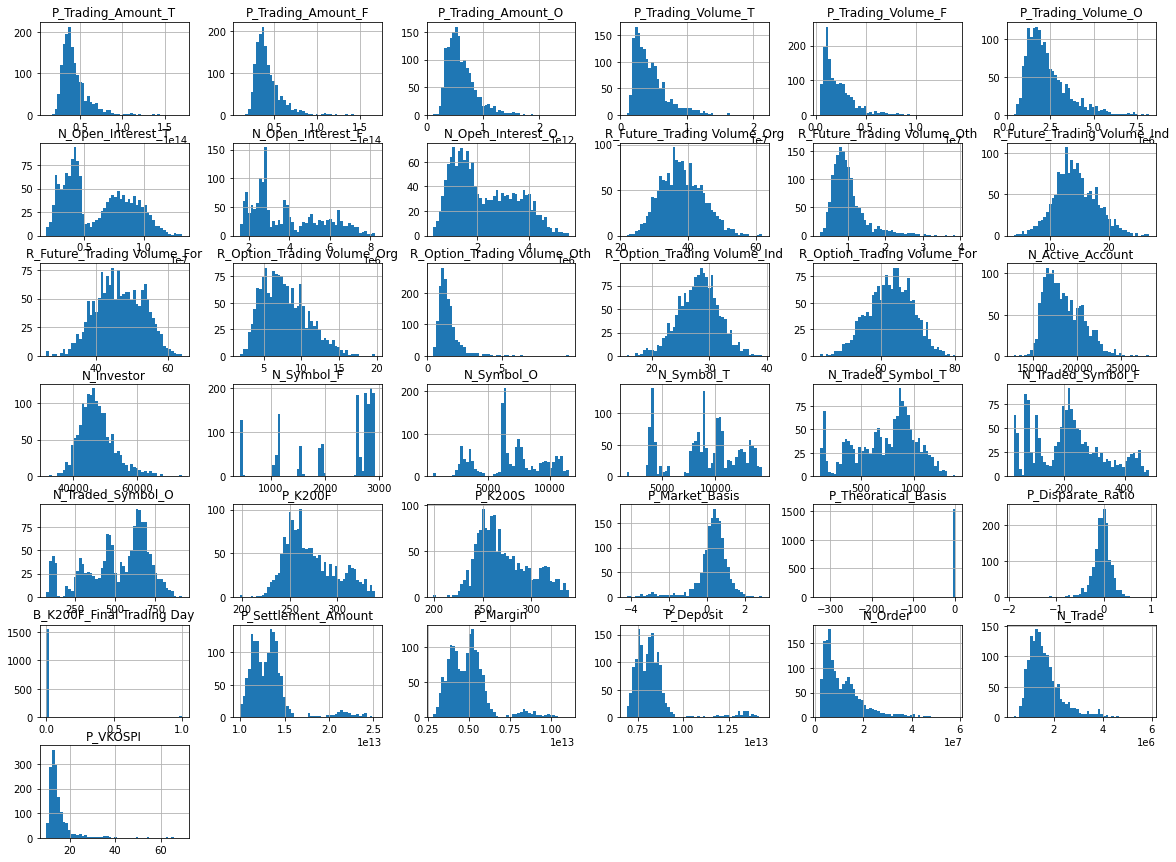

viz 2 : Heatmap(correlation) of all variables (before preprocessing)


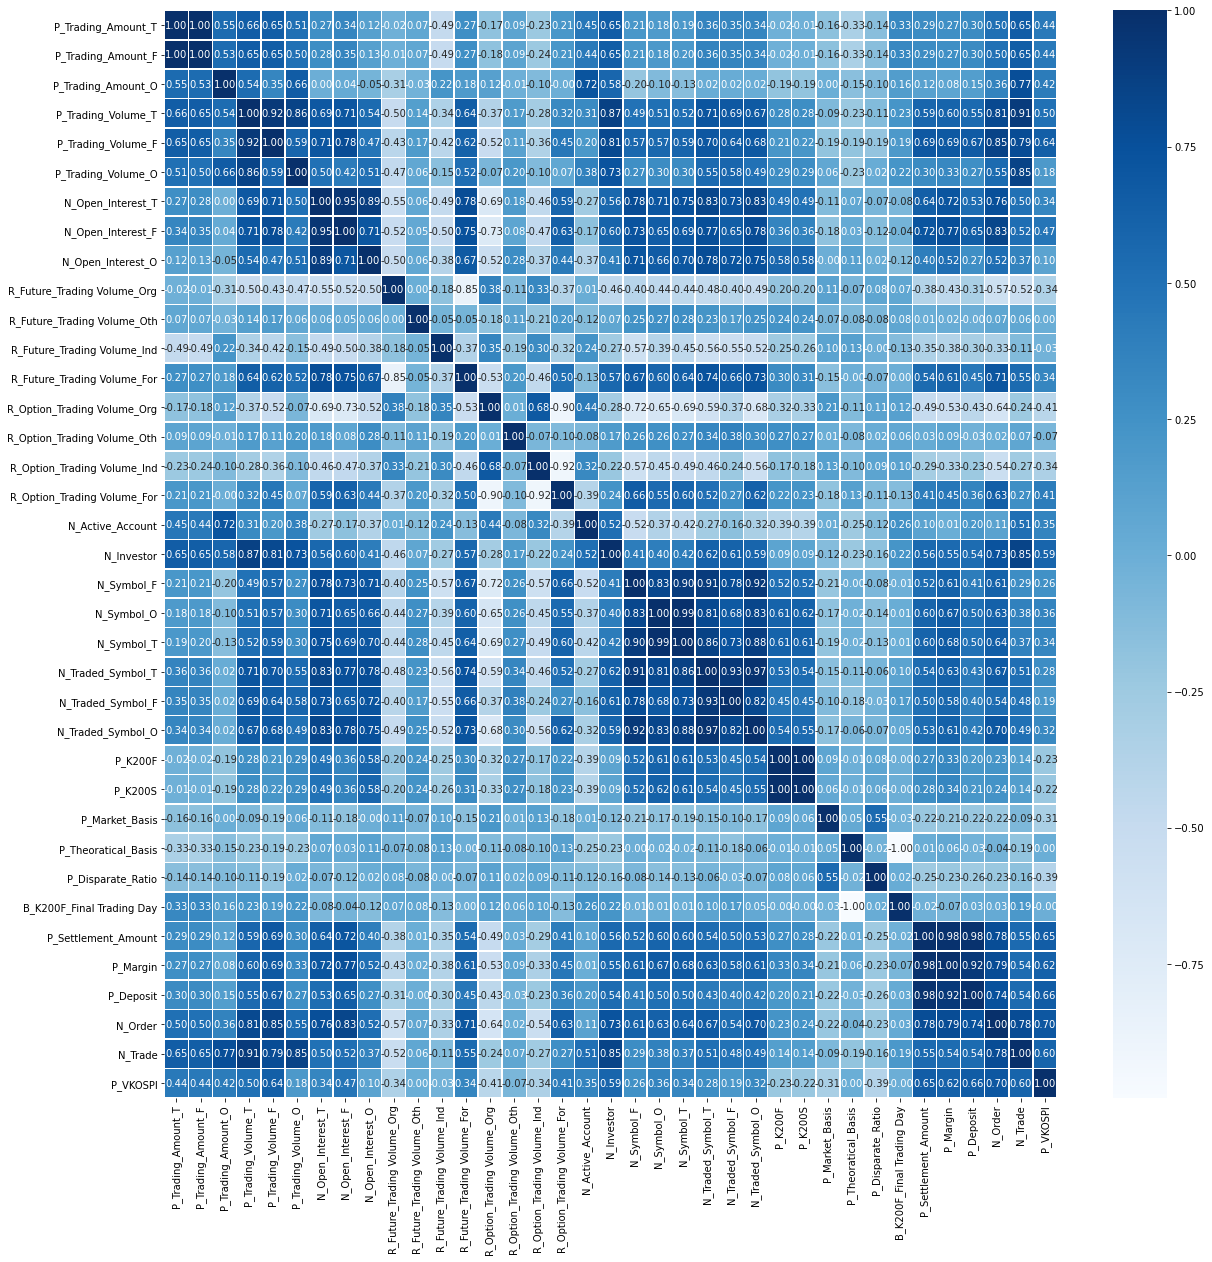

viz 3 : Correlation(by N_Order) of all variables (before preprocessing)
P_Trading_Volume_F             0.852787
N_Open_Interest_F              0.829750
P_Trading_Volume_T             0.806525
P_Margin                       0.787829
N_Trade                        0.784532
P_Settlement_Amount            0.780566
N_Open_Interest_T              0.760303
P_Deposit                      0.743503
N_Investor                     0.727923
R_Future_Trading Volume_For    0.708705
N_Traded_Symbol_O              0.703006
P_VKOSPI                       0.698744
N_Traded_Symbol_T              0.671866
N_Symbol_T                     0.644079
R_Option_Trading Volume_Org    0.643862
R_Option_Trading Volume_For    0.634304
N_Symbol_O                     0.625851
N_Symbol_F                     0.613757
R_Future_Trading Volume_Org    0.567300
P_Trading_Volume_O             0.546059
N_Traded_Symbol_F              0.539873
R_Option_Trading Volume_Ind    0.538769
N_Open_Interest_O              0.524394
P_Tradin

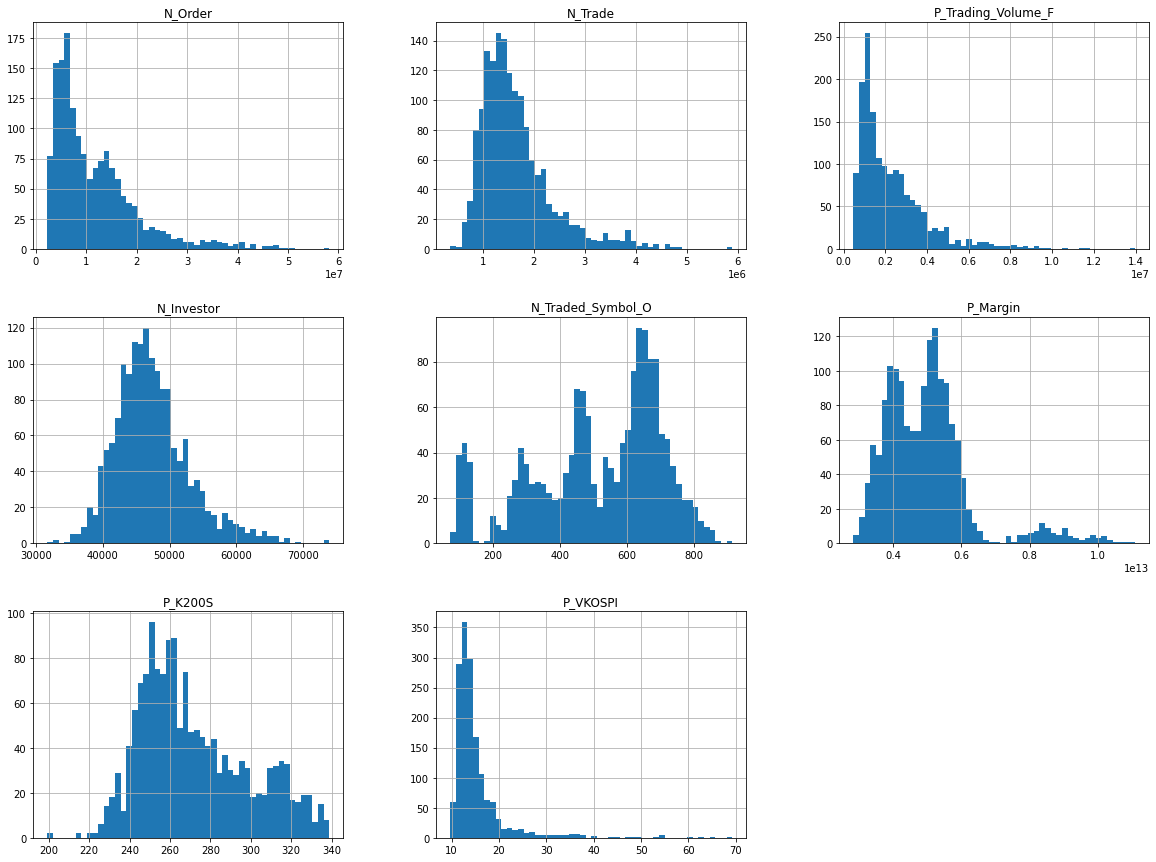

viz 1 : Discription of P_VKOSPI_T1 (after preprocessing)
count    1453.000000
mean       14.874171
std         5.799537
min         9.720000
25%        12.290000
50%        13.520000
75%        15.400000
max        69.240000
Name: P_VKOSPI_T1, dtype: float64
viz 2 : Discription of Stat_Features (after preprocessing)
         N_Order_T1  P_VKOSPI_T1  Max_Capacity
count  1.453000e+03  1453.000000  1.453000e+03
mean   1.122114e+07    14.874171  1.881454e+07
std    7.487899e+06     5.799537  1.054855e+07
min    2.369517e+06     9.720000  5.874891e+06
25%    5.799946e+06    12.290000  1.001265e+07
50%    9.047956e+06    13.520000  1.674640e+07
75%    1.478362e+07    15.400000  2.537353e+07
max    4.937198e+07    69.240000  4.937198e+07
viz 3 : Plot comparison of major variables (after preprocessing)


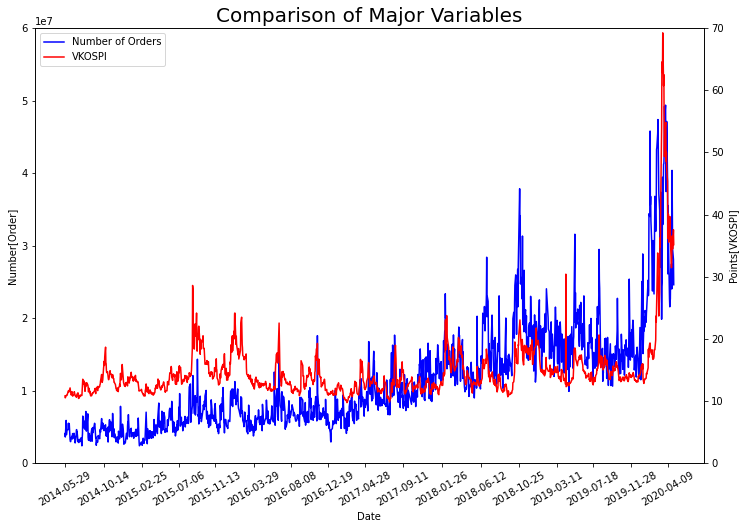

viz 4 : Plot comparison of capacity efficiency (after preprocessing)
2020-03-30 00:00:00


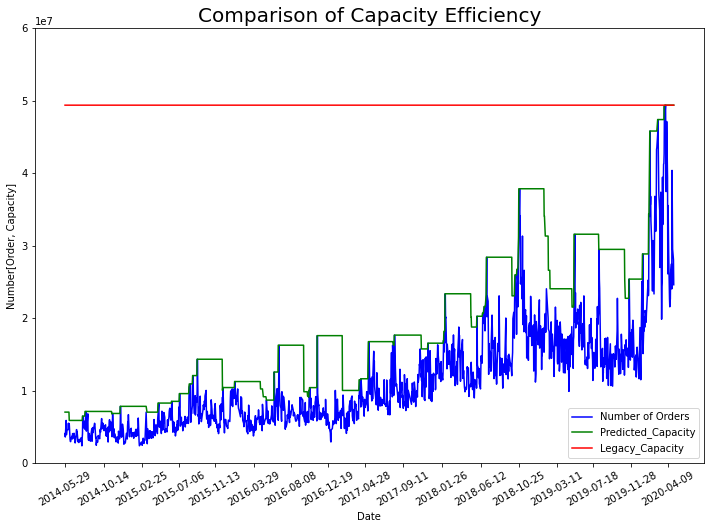

viz 1 : Correlation (by Max_Capacity) of all variables (after preprocessing)
N_Order_T12     0.886841
N_Order_T11     0.886474
N_Order_T10     0.885861
N_Order_T13     0.885643
N_Order_T14     0.885311
                  ...   
P_VKOSPI_T56    0.209861
P_VKOSPI_T57    0.201778
P_VKOSPI_T58    0.192563
P_VKOSPI_T59    0.183365
P_VKOSPI_T60    0.172871
Name: Max_Capacity, Length: 480, dtype: float64
viz 2-1 : Check Skewness / Kurtosis of numeric features before normalization (after preprocessing)
N_Order_T1                     Skewness: 01.81      Kurtosis: 004.52
N_Order_T2                     Skewness: 01.81      Kurtosis: 004.55
N_Order_T3                     Skewness: 01.82      Kurtosis: 004.59
N_Order_T4                     Skewness: 01.82      Kurtosis: 004.63
N_Order_T5                     Skewness: 01.83      Kurtosis: 004.68
N_Order_T6                     Skewness: 01.82      Kurtosis: 004.70
N_Order_T7                     Skewness: 01.83      Kurtosis: 004.72
N_Order_T8        

N_Investor_T16                 Skewness: 01.00      Kurtosis: 002.03
N_Investor_T17                 Skewness: 01.00      Kurtosis: 002.04
N_Investor_T18                 Skewness: 00.99      Kurtosis: 002.03
N_Investor_T19                 Skewness: 00.99      Kurtosis: 002.02
N_Investor_T20                 Skewness: 00.98      Kurtosis: 002.04
N_Investor_T21                 Skewness: 00.98      Kurtosis: 002.06
N_Investor_T22                 Skewness: 00.97      Kurtosis: 002.05
N_Investor_T23                 Skewness: 00.96      Kurtosis: 002.03
N_Investor_T24                 Skewness: 00.93      Kurtosis: 001.97
N_Investor_T25                 Skewness: 00.91      Kurtosis: 001.96
N_Investor_T26                 Skewness: 00.90      Kurtosis: 001.96
N_Investor_T27                 Skewness: 00.89      Kurtosis: 001.95
N_Investor_T28                 Skewness: 00.82      Kurtosis: 001.62
N_Investor_T29                 Skewness: 00.81      Kurtosis: 001.61
N_Investor_T30                 Ske

P_K200S_T21                    Skewness: 00.54      Kurtosis: -00.61
P_K200S_T22                    Skewness: 00.54      Kurtosis: -00.61
P_K200S_T23                    Skewness: 00.54      Kurtosis: -00.61
P_K200S_T24                    Skewness: 00.54      Kurtosis: -00.61
P_K200S_T25                    Skewness: 00.55      Kurtosis: -00.61
P_K200S_T26                    Skewness: 00.56      Kurtosis: -00.62
P_K200S_T27                    Skewness: 00.56      Kurtosis: -00.62
P_K200S_T28                    Skewness: 00.58      Kurtosis: -00.64
P_K200S_T29                    Skewness: 00.58      Kurtosis: -00.64
P_K200S_T30                    Skewness: 00.58      Kurtosis: -00.64
P_K200S_T31                    Skewness: 00.59      Kurtosis: -00.64
P_K200S_T32                    Skewness: 00.59      Kurtosis: -00.64
P_K200S_T33                    Skewness: 00.59      Kurtosis: -00.64
P_K200S_T34                    Skewness: 00.59      Kurtosis: -00.64
P_K200S_T35                    Ske

P_Trading_Volume_F_T14         Skewness: 02.23      Kurtosis: 007.68
P_Trading_Volume_F_T15         Skewness: 02.24      Kurtosis: 007.76
P_Trading_Volume_F_T16         Skewness: 02.25      Kurtosis: 007.82
P_Trading_Volume_F_T17         Skewness: 02.26      Kurtosis: 007.87
P_Trading_Volume_F_T18         Skewness: 02.26      Kurtosis: 007.94
P_Trading_Volume_F_T19         Skewness: 02.27      Kurtosis: 008.02
P_Trading_Volume_F_T20         Skewness: 02.28      Kurtosis: 008.09
P_Trading_Volume_F_T21         Skewness: 02.29      Kurtosis: 008.17
P_Trading_Volume_F_T22         Skewness: 02.29      Kurtosis: 008.26
P_Trading_Volume_F_T23         Skewness: 02.29      Kurtosis: 008.33
P_Trading_Volume_F_T24         Skewness: 02.27      Kurtosis: 008.30
P_Trading_Volume_F_T25         Skewness: 02.26      Kurtosis: 008.34
P_Trading_Volume_F_T26         Skewness: 02.25      Kurtosis: 008.37
P_Trading_Volume_F_T27         Skewness: 02.22      Kurtosis: 008.30
P_Trading_Volume_F_T28         Ske

P_Margin_T6                    Skewness: 00.87      Kurtosis: 002.24
P_Margin_T7                    Skewness: 00.85      Kurtosis: 002.16
P_Margin_T8                    Skewness: 00.82      Kurtosis: 002.09
P_Margin_T9                    Skewness: 00.80      Kurtosis: 002.02
P_Margin_T10                   Skewness: 00.78      Kurtosis: 001.96
P_Margin_T11                   Skewness: 00.76      Kurtosis: 001.92
P_Margin_T12                   Skewness: 00.74      Kurtosis: 001.87
P_Margin_T13                   Skewness: 00.72      Kurtosis: 001.83
P_Margin_T14                   Skewness: 00.67      Kurtosis: 001.58
P_Margin_T15                   Skewness: 00.62      Kurtosis: 001.37
P_Margin_T16                   Skewness: 00.57      Kurtosis: 001.17
P_Margin_T17                   Skewness: 00.52      Kurtosis: 000.98
P_Margin_T18                   Skewness: 00.47      Kurtosis: 000.77
P_Margin_T19                   Skewness: 00.42      Kurtosis: 000.54
P_Margin_T20                   Ske

P_VKOSPI_T45                   Skewness: 01.48      Kurtosis: 003.33
P_VKOSPI_T46                   Skewness: 01.48      Kurtosis: 003.34
P_VKOSPI_T47                   Skewness: 01.48      Kurtosis: 003.37
P_VKOSPI_T48                   Skewness: 01.49      Kurtosis: 003.40
P_VKOSPI_T49                   Skewness: 01.49      Kurtosis: 003.43
P_VKOSPI_T50                   Skewness: 01.50      Kurtosis: 003.45
P_VKOSPI_T51                   Skewness: 01.50      Kurtosis: 003.47
P_VKOSPI_T52                   Skewness: 01.50      Kurtosis: 003.48
P_VKOSPI_T53                   Skewness: 01.51      Kurtosis: 003.49
P_VKOSPI_T54                   Skewness: 01.51      Kurtosis: 003.51
P_VKOSPI_T55                   Skewness: 01.51      Kurtosis: 003.54
P_VKOSPI_T56                   Skewness: 01.52      Kurtosis: 003.56
P_VKOSPI_T57                   Skewness: 01.52      Kurtosis: 003.59
P_VKOSPI_T58                   Skewness: 01.53      Kurtosis: 003.61
P_VKOSPI_T59                   Ske

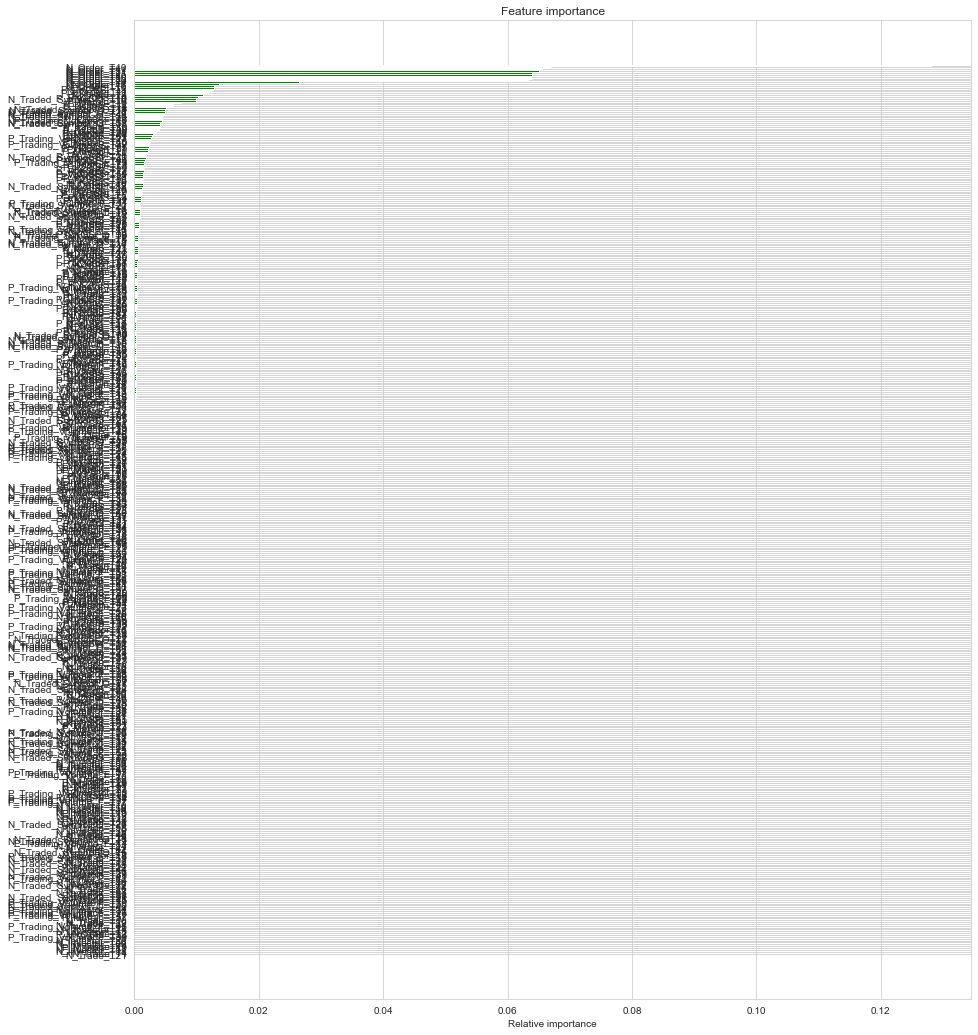

<Figure size 1440x576 with 0 Axes>

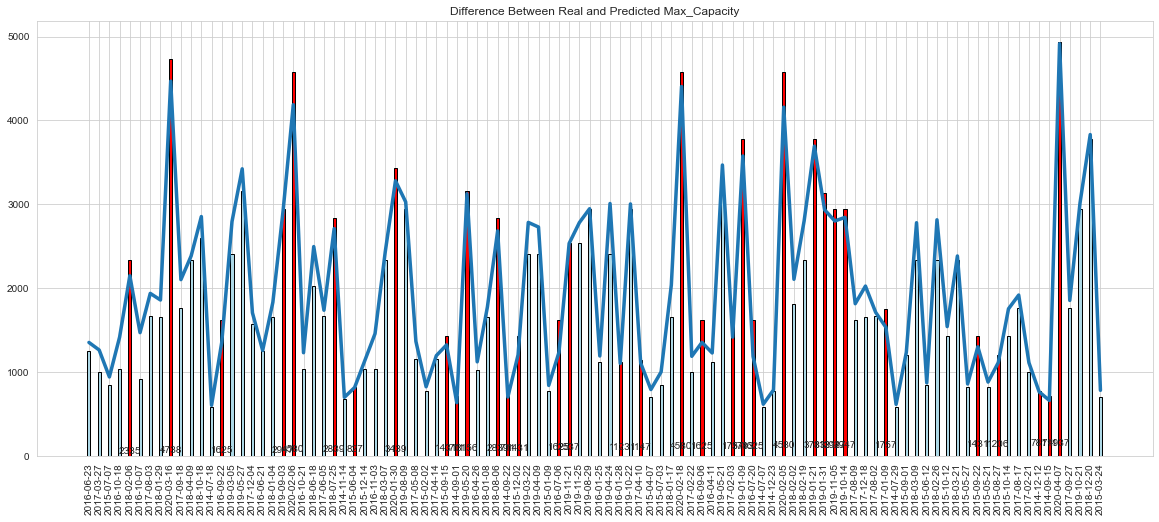

최대 일별 낭비 용량(만건) :  437
Decisiontree 모델
Test result
R2                  : 0.7283
MAE                 : 2929633.49
MSE                 : 26132834974761.42
RMSE                : 5112028.46
MAPE                : 15.87
MPE                 : -4.36
Validation result
R2                  : 0.8420
MAE                 : 2462901.51
MSE                 : 17472150223684.18
RMSE                : 4179970.12
MAPE                : 13.88
MPE                 : -3.41
Feature Importance of  DecisionTreeRegressor
N_Order_T1                     importance: 0.0000
N_Order_T2                     importance: 0.0022
N_Order_T3                     importance: 0.0000
N_Order_T4                     importance: 0.0000
N_Order_T5                     importance: 0.1312
N_Order_T6                     importance: 0.0000
N_Order_T7                     importance: 0.0000
N_Order_T8                     importance: 0.0000
N_Order_T9                     importance: 0.0000
N_Order_T10                    importance: 0.0000
N_Or

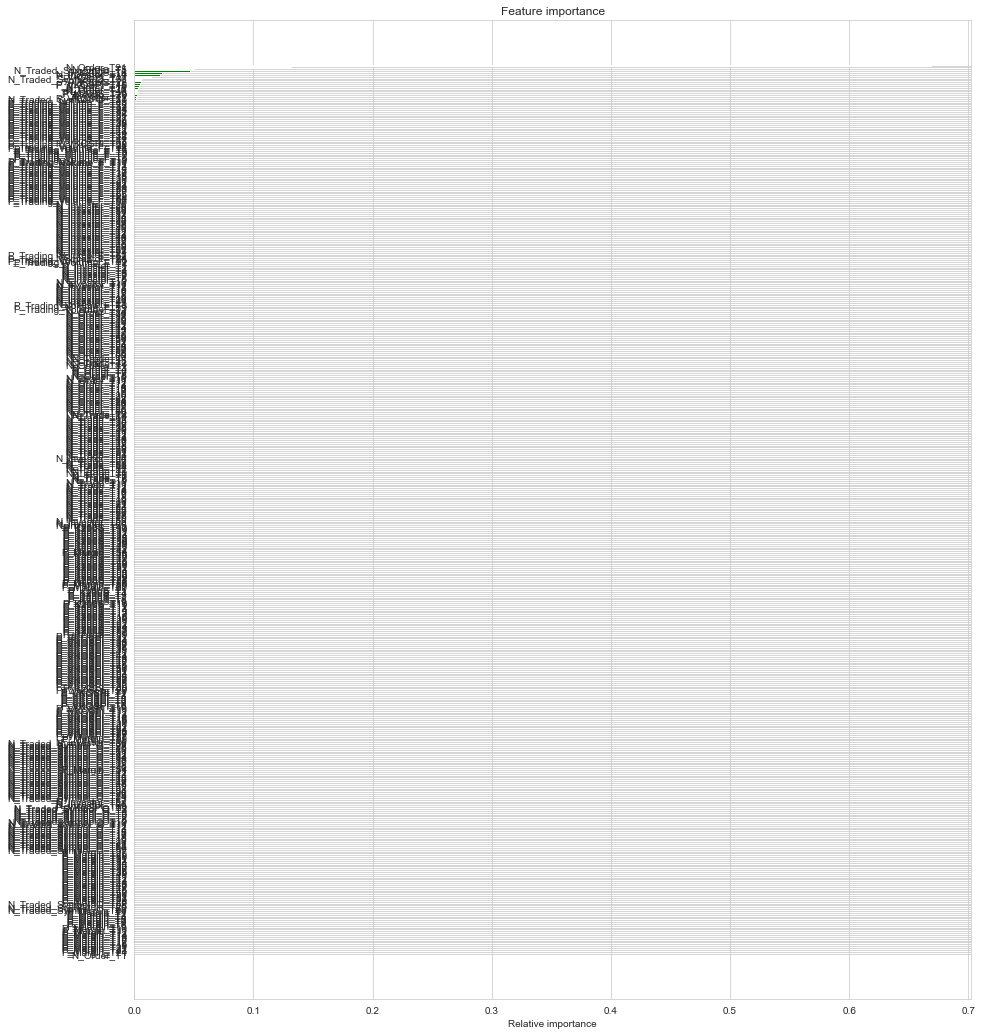

<Figure size 1440x576 with 0 Axes>

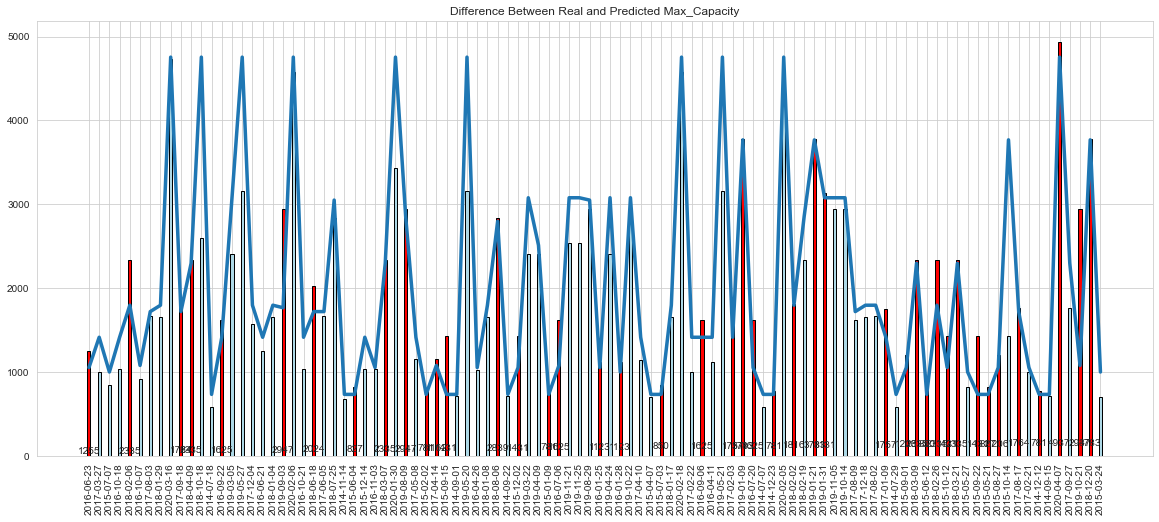

최대 일별 낭비 용량(만건) :  1867
Lasso 모델
Test result
R2                  : 0.9086
MAE                 : 2256398.60
MSE                 : 8790879156615.14
RMSE                : 2964941.68
MAPE                : 13.43
MPE                 : -6.41
Validation result
R2                  : 0.9224
MAE                 : 2157684.23
MSE                 : 8582251472428.99
RMSE                : 2929548.00
MAPE                : 11.36
MPE                 : 2.24
Lasso  has no attribute 'feature_importances function'


<Figure size 1440x576 with 0 Axes>

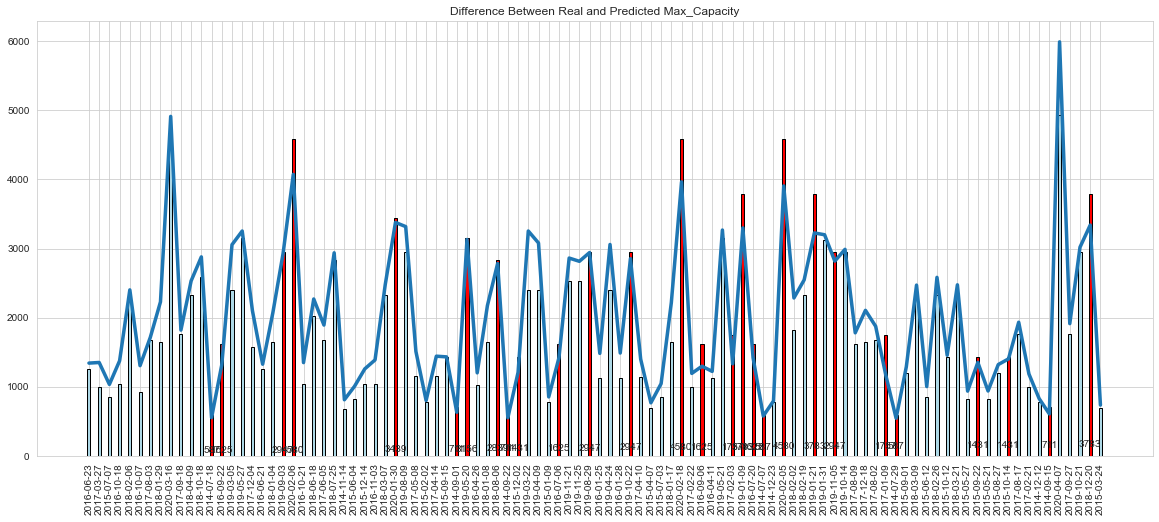

최대 일별 낭비 용량(만건) :  674
Ridge 모델
Test result
R2                  : 0.9404
MAE                 : 1781592.26
MSE                 : 5736782892519.64
RMSE                : 2395158.22
MAPE                : 10.77
MPE                 : 1.70
Validation result
R2                  : 0.9396
MAE                 : 2106946.37
MSE                 : 6679748366509.10
RMSE                : 2584520.92
MAPE                : 13.44
MPE                 : 9.59
Ridge  has no attribute 'feature_importances function'


<Figure size 1440x576 with 0 Axes>

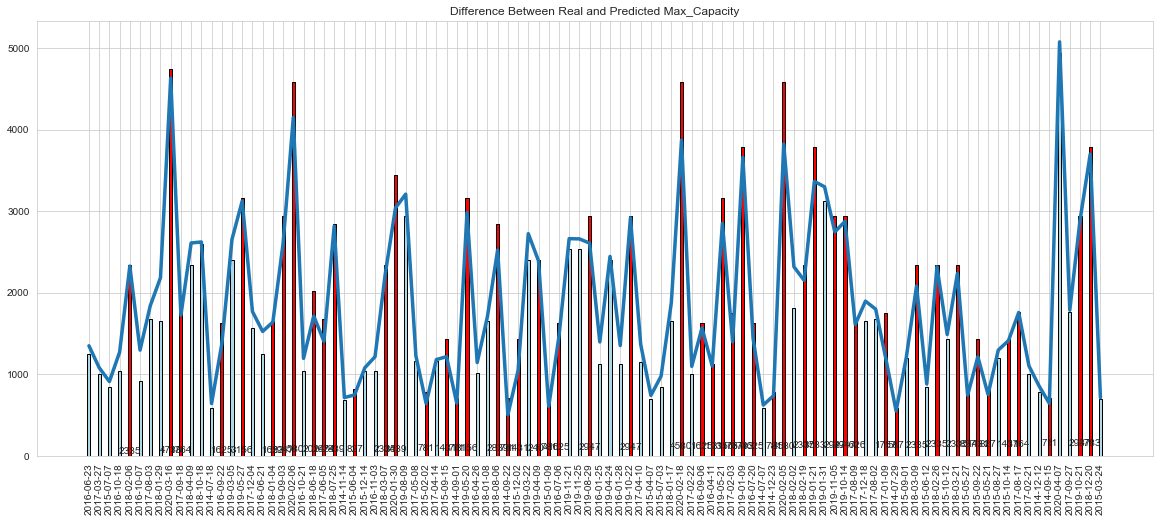

최대 일별 낭비 용량(만건) :  754
Xgboost 모델
Test result
R2                  : 0.9294
MAE                 : 1855895.99
MSE                 : 6787046626340.20
RMSE                : 2605196.08
MAPE                : 11.20
MPE                 : -6.75
Validation result
R2                  : 0.9490
MAE                 : 1691508.45
MSE                 : 5644507125724.10
RMSE                : 2375817.15
MAPE                : 10.38
MPE                 : -4.31
Feature Importance of  XGBRegressor
N_Order_T1                     importance: 0.0002
N_Order_T2                     importance: 0.0001
N_Order_T3                     importance: 0.0000
N_Order_T4                     importance: 0.0001
N_Order_T5                     importance: 0.0191
N_Order_T6                     importance: 0.0002
N_Order_T7                     importance: 0.0014
N_Order_T8                     importance: 0.0003
N_Order_T9                     importance: 0.0000
N_Order_T10                    importance: 0.0002
N_Order_T11         

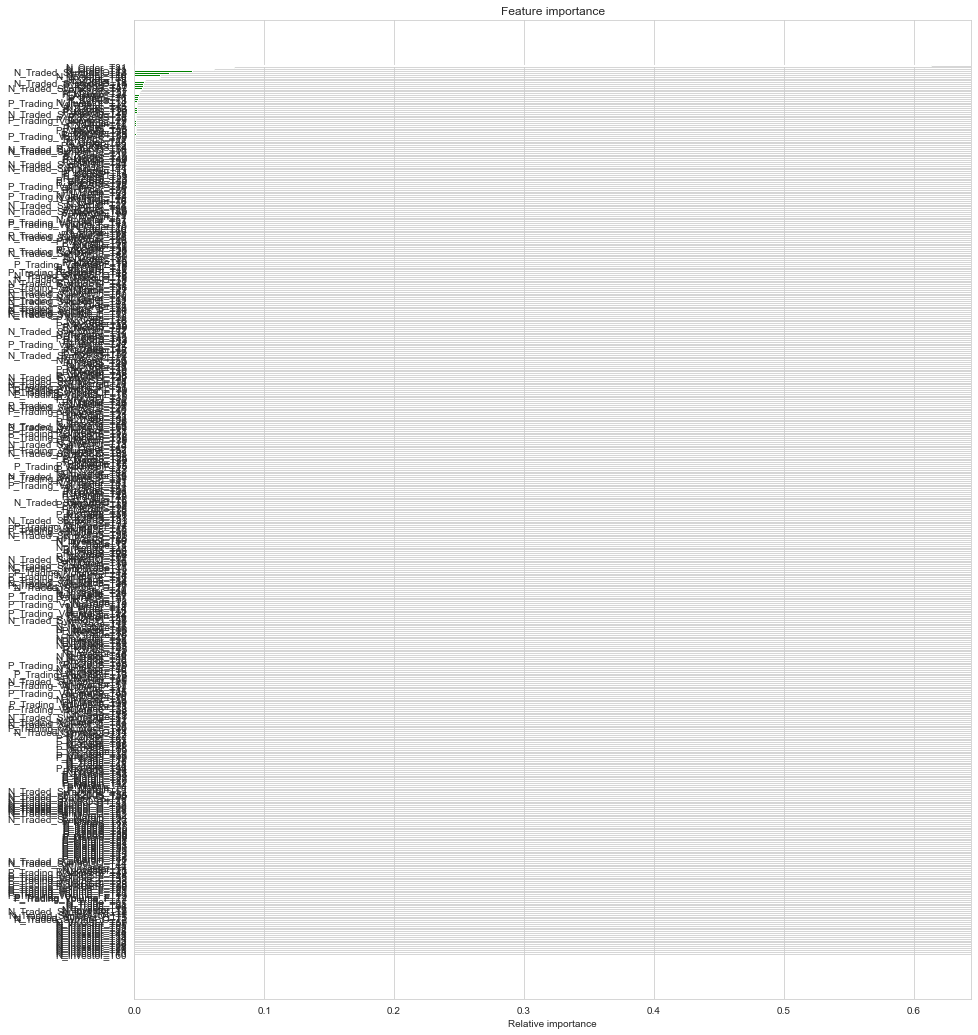

<Figure size 1440x576 with 0 Axes>

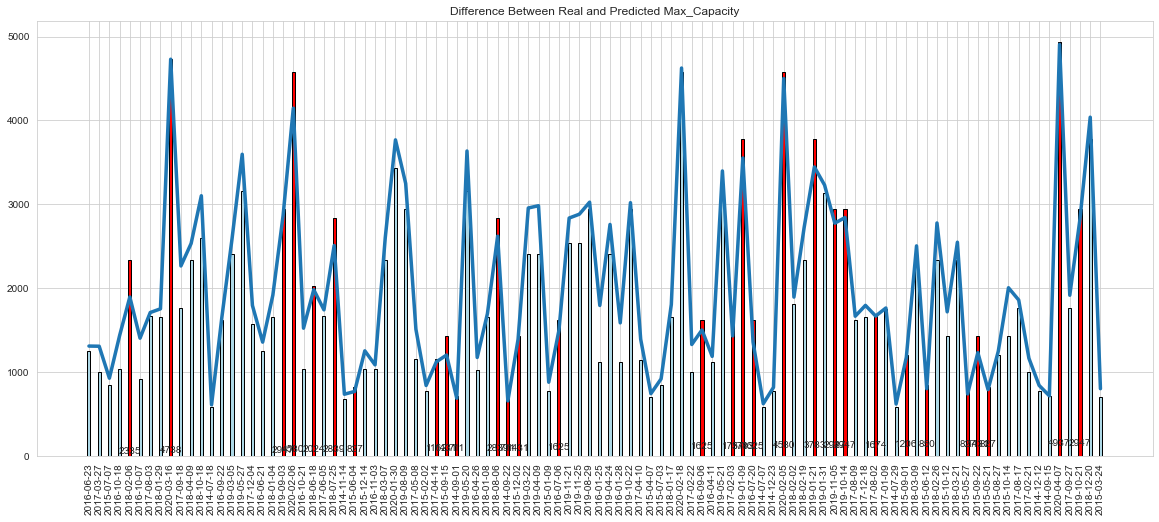

최대 일별 낭비 용량(만건) :  439


In [3]:
config = {
            "path" : path,
            "path_data" : path_data,
            "path_data_corr" : path_data_corr,
            "lst_sel_features" : lst_sel_features,
            "Stat_Features" : Stat_Features,
            "lst_cols_remove" : lst_cols_remove,
            "dict_modelling" : dict_modelling,
            "lst_XY" : lst_XY   
         }

result, result_valid = main(config, 'one')